In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from numpy import nan

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [3]:
data = pd.read_csv(r"E:\WORK\Banque_Misr Data_Science\weatherAUS (1).csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [6]:
data.duplicated().sum()

0

In [7]:
round(data.isna().mean() * 100, 2).sort_values(ascending= False)

Sunshine         48.01
Evaporation      43.17
Cloud3pm         40.81
Cloud9am         38.42
Pressure9am      10.36
Pressure3pm      10.33
WindDir9am        7.26
WindGustDir       7.10
WindGustSpeed     7.06
Humidity3pm       3.10
WindDir3pm        2.91
Temp3pm           2.48
RainTomorrow      2.25
Rainfall          2.24
RainToday         2.24
WindSpeed3pm      2.11
Humidity9am       1.82
Temp9am           1.21
WindSpeed9am      1.21
MinTemp           1.02
MaxTemp           0.87
Location          0.00
Date              0.00
dtype: float64

In [8]:
print(f"Percentage of the Whole Null Values {data.isna().sum().sum() / data.size * 100:.2f}%")

Percentage of the Whole Null Values 10.26%


In [9]:
(data["Location"].value_counts(normalize= True) * 100).head(10)

Canberra        2.362161
Sydney          2.298914
Darwin          2.195105
Melbourne       2.195105
Brisbane        2.195105
Adelaide        2.195105
Perth           2.195105
Hobart          2.195105
Albany          2.089922
MountGambier    2.089922
Name: Location, dtype: float64

In [10]:
print("Number of Unique Locations in our Dataset:", data["Location"].value_counts().count(), "locations")

Number of Unique Locations in our Dataset: 49 locations


In [11]:
data["Date"] = pd.to_datetime(data["Date"])

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_4888\2487158108.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Date"] = pd.to_datetime(data["Date"])


In [12]:
data["Year"] = data["Date"].dt.year

In [13]:
data["Month"] = data["Date"].dt.month

**Removing the Null Values from `RainToday` & `RainTomorrow` Columns**

In [14]:
round(data["RainToday"].value_counts(dropna= False, normalize= True) * 100, 2)

No     75.84
Yes    21.92
NaN     2.24
Name: RainToday, dtype: float64

In [15]:
round(data["RainTomorrow"].value_counts(dropna= False, normalize= True) * 100, 2)

No     75.84
Yes    21.91
NaN     2.25
Name: RainTomorrow, dtype: float64

In [16]:
mask = data["RainToday"].isna() | data["RainTomorrow"].isna()
data_subset = data[mask]
data_subset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
14,2008-12-15,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,...,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN,2008,12
15,2008-12-16,Albury,9.8,27.7,NaN,NaN,NaN,WNW,50.0,NaN,...,1013.4,1010.3,0.0,NaN,17.3,26.2,NaN,No,2008,12
283,2009-10-09,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,...,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN,2009,10
284,2009-11-09,Albury,NaN,18.8,NaN,NaN,NaN,N,31.0,SE,...,1022.2,1018.2,NaN,NaN,8.7,18.1,NaN,No,2009,11
435,2010-09-02,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,...,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN,2010,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145092,2016-06-23,Uluru,14.2,18.7,NaN,NaN,NaN,NaN,NaN,W,...,1015.2,1014.6,8.0,8.0,16.6,17.5,NaN,NaN,2016,6
145093,2016-06-24,Uluru,3.2,17.9,NaN,NaN,NaN,E,44.0,SE,...,1022.4,1019.0,NaN,NaN,8.8,17.2,NaN,No,2016,6
145335,2017-02-21,Uluru,13.5,NaN,0.0,NaN,NaN,NaN,NaN,ENE,...,1013.7,1008.4,NaN,NaN,25.2,34.4,No,NaN,2017,2
145336,2017-02-22,Uluru,16.1,38.0,NaN,NaN,NaN,SSW,35.0,SSW,...,1011.4,1008.6,NaN,NaN,27.7,36.4,NaN,No,2017,2


In [17]:
data = data[~ mask]
data.shape

(140787, 25)

**Removing the Null Values from rows with more than or equal 50% Null Percentage**

In [18]:
# Count the number of null values in each row
null_counts = data.isnull().sum(axis=1)
print(null_counts, "\n\n")

# Get the total number of columns in the DataFrame
total_columns = len(data.columns)
print("Count of Columns:", total_columns)

0         3
1         4
2         3
3         4
4         2
         ..
145454    4
145455    4
145456    4
145457    4
145458    2
Length: 140787, dtype: int64 


Count of Columns: 25


In [19]:
# Calculate the percentage of null values for each row
null_percentages = (null_counts / total_columns) * 100

# Add the null percentage as a new column to the DataFrame
data['NullPercentage'] = null_percentages

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,NullPercentage
0,2008-01-12,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,1,12.0
1,2008-02-12,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,2,16.0
2,2008-03-12,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,3,12.0
3,2008-04-12,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,4,16.0
4,2008-05-12,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,5,8.0


In [20]:
mask = data["NullPercentage"] >= 50
data[mask]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,NullPercentage
7992,2014-07-26,Cobar,NaN,NaN,0.0,3.4,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,No,No,2014,7,60.0
7993,2014-07-27,Cobar,NaN,18.9,0.0,4.1,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,NaN,NaN,No,No,2014,7,56.0
7999,2014-02-08,Cobar,NaN,13.7,0.0,5.4,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,NaN,NaN,No,No,2014,2,56.0
10622,2013-12-07,CoffsHarbour,7.3,19.4,0.0,0.2,NaN,NaN,NaN,NaN,...,NaN,6.0,1.0,NaN,NaN,No,No,2013,12,52.0
15100,2008-12-25,Newcastle,NaN,25.6,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,No,No,2008,12,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115315,2010-11-27,PearceRAAF,NaN,NaN,0.0,NaN,13.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,No,No,2010,11,68.0
115316,2010-11-28,PearceRAAF,NaN,NaN,0.0,NaN,13.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,No,No,2010,11,68.0
115624,2011-01-11,PearceRAAF,16.3,30.7,0.0,NaN,12.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,No,No,2011,1,60.0
115705,2012-01-21,PearceRAAF,23.1,NaN,0.0,NaN,13.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,No,No,2012,1,64.0


In [21]:
data = data[~ mask]
data.shape

(140553, 26)

In [22]:
round(data.isna().mean() * 100, 2).sort_values(ascending= False)

Sunshine          47.37
Evaporation       42.32
Cloud3pm          39.75
Cloud9am          37.32
Pressure3pm        9.64
Pressure9am        9.62
WindDir9am         6.71
WindGustDir        6.36
WindGustSpeed      6.32
WindDir3pm         2.45
Humidity3pm        2.34
Temp3pm            1.72
WindSpeed3pm       1.65
Humidity9am        0.95
WindSpeed9am       0.63
Temp9am            0.34
MinTemp            0.21
MaxTemp            0.15
Year               0.00
RainTomorrow       0.00
Month              0.00
Date               0.00
RainToday          0.00
Location           0.00
Rainfall           0.00
NullPercentage     0.00
dtype: float64

In [23]:
print(f"Percentage of the Whole Null Values {data.isna().sum().sum() / data.size * 100:.2f}%")

Percentage of the Whole Null Values 8.30%


**Summarizing the Locations into States and Territories**

In [24]:
data["Location"].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [25]:
WA = "Albany|Witchcliffe|PearceRAAF|PerthAirport|Perth|SalmonGums|Walpole"
SA = "Adelaide|MountGambier|Nuriootpa|Woomera"
TAS = "Hobart|Launceston"
QLD = "Brisbane|Cairns|GoldCoast|Townsville"
NSW = "Albury|BadgerysCreek|Cobar|CoffsHarbour|Moree|Newcastle|NorahHead|Penrith|Sydney|SydneyAirport|WaggaWagga|Williamtown|Wollongong"
VIC = "Richmond|Ballarat|Bendigo|Sale|MelbourneAirport|Melbourne|Mildura|Nhil|Portland|Watsonia|Dartmoor"
NT = "AliceSprings|Darwin|Katherine|Uluru"
ACT = "Canberra|Tuggeranong|MountGinini"
NorfolkIsland = "NorfolkIsland"

conditions = [
(data["Location"].str.contains(WA)),
(data["Location"].str.contains(SA)),
(data["Location"].str.contains(TAS)),
(data["Location"].str.contains(QLD)),
(data["Location"].str.contains(NSW)),
(data["Location"].str.contains(VIC)),
(data["Location"].str.contains(NT)),
(data["Location"].str.contains(ACT)),
(data["Location"].str.contains(NorfolkIsland))]

States_Territories = ["WA", "SA", "TAS", "QLD", "NSW", "VIC", "NT", "ACT", "NorfolkIsland"]

data["States_Territories"] = np.select(conditions, States_Territories, default="NSW")

In [26]:
data["States_Territories"].value_counts(normalize= True) * 100

NSW              26.858196
VIC              21.865773
WA               14.555363
QLD               8.571144
SA                8.552646
NT                6.591108
ACT               6.497905
TAS               4.413282
NorfolkIsland     2.094584
Name: States_Territories, dtype: float64

**Deleting Null values in Variables `WindGustDir`, `WindDir9am`, `WindDir3pm`**

In [27]:
mask = data["WindGustDir"].isna() | data["WindDir9am"].isna() | data["WindDir3pm"].isna()
data[mask]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,NullPercentage,States_Territories
26,2008-12-27,Albury,16.9,33.0,0.0,NaN,NaN,WSW,57.0,NaN,...,NaN,1.0,26.6,31.2,No,No,2008,12,16.0,NSW
64,2009-03-02,Albury,21.5,37.7,0.0,NaN,NaN,NaN,NaN,N,...,NaN,NaN,27.2,36.2,No,No,2009,3,28.0,NSW
65,2009-04-02,Albury,21.7,36.9,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,25.5,35.2,No,No,2009,4,32.0,NSW
75,2009-02-14,Albury,12.4,29.2,0.0,NaN,NaN,NE,39.0,S,...,NaN,NaN,18.3,28.5,No,No,2009,2,20.0,NSW
86,2009-02-25,Albury,8.9,31.9,0.0,NaN,NaN,WNW,43.0,NaN,...,7.0,7.0,15.0,29.3,No,No,2009,2,12.0,NSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145169,2016-08-09,Uluru,15.1,31.1,0.0,NaN,NaN,WSW,48.0,NaN,...,8.0,NaN,21.0,30.3,No,No,2016,8,16.0,NT
145316,2017-02-02,Uluru,27.5,36.5,0.0,NaN,NaN,NaN,NaN,ESE,...,NaN,4.0,29.0,35.4,No,Yes,2017,2,20.0,NT
145323,2017-09-02,Uluru,25.6,40.6,0.2,NaN,NaN,ENE,56.0,NaN,...,NaN,1.0,32.0,38.6,No,No,2017,9,16.0,NT
145422,2017-05-19,Uluru,4.3,22.4,0.0,NaN,NaN,ENE,26.0,NaN,...,NaN,NaN,10.9,21.3,No,No,2017,5,20.0,NT


In [28]:
data = data[~ mask]
data.shape

(123710, 27)

**Converting RainToday and RainTomorrow Variables to Numerical Variables through One-Hot-Encoding**

In [29]:
data["RainToday"] = OneHotEncoder(drop= 'first').fit_transform(data[['RainToday']]).toarray()
data['RainToday']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145454    0.0
145455    0.0
145456    0.0
145457    0.0
145458    0.0
Name: RainToday, Length: 123710, dtype: float64

In [30]:
data["RainTomorrow"] = OneHotEncoder(drop= 'first').fit_transform(data[['RainTomorrow']]).toarray()
data['RainTomorrow']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145454    0.0
145455    0.0
145456    0.0
145457    0.0
145458    0.0
Name: RainTomorrow, Length: 123710, dtype: float64

**Label Encoding the `States_Territories`**

In [31]:
# Instantiate LabelEncoder()
encoder = LabelEncoder()

series = data["States_Territories"]

# Fit to the data
encoder.fit(series)

# Transform the data
transformed = encoder.transform(series)

In [32]:
print('Classes: \n', list(encoder.classes_))
print('\nEncoded classes: \n', encoder.transform(encoder.classes_))

Classes: 
 ['ACT', 'NSW', 'NT', 'NorfolkIsland', 'QLD', 'SA', 'TAS', 'VIC', 'WA']

Encoded classes: 
 [0 1 2 3 4 5 6 7 8]


In [33]:
data["States_Territories_Encoded"] = pd.Series(transformed)
data["States_Territories"].describe()

count     123710
unique         9
top          NSW
freq       31234
Name: States_Territories, dtype: object

In [34]:
pd.Series(transformed).value_counts(normalize= True) * 100

1    25.247757
7    22.731388
8    13.310161
4     9.413144
5     9.193275
2     7.102094
0     6.149867
6     4.533991
3     2.318325
dtype: float64

**Merging Variables of 9am and 3pm Together**

In [35]:
data["WindSpeed"] = (data["WindSpeed9am"] + data["WindSpeed3pm"]) / 2

data["Humidity"] = (data["Humidity9am"] + data["Humidity3pm"]) / 2

data["Pressure"] = (data["Pressure9am"] + data["Pressure3pm"]) / 2

data["Cloud"] = (data["Cloud9am"] + data["Cloud3pm"]) / 2

data["Temp"] = (data["Temp9am"] + data["Temp3pm"]) / 2

In [36]:
data = data[["Date", "Year", "Month", "Location", "States_Territories", "States_Territories_Encoded", "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustDir", "WindGustSpeed", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow", "WindSpeed", "Humidity", "Pressure", "Cloud", "Temp"]]
data = data.reset_index(drop= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        123710 non-null  datetime64[ns]
 1   Year                        123710 non-null  int64         
 2   Month                       123710 non-null  int64         
 3   Location                    123710 non-null  object        
 4   States_Territories          123710 non-null  object        
 5   States_Territories_Encoded  103830 non-null  float64       
 6   MinTemp                     123620 non-null  float64       
 7   MaxTemp                     123665 non-null  float64       
 8   Rainfall                    123710 non-null  float64       
 9   Evaporation                 73063 non-null   float64       
 10  Sunshine                    67087 non-null   float64       
 11  WindGustDir                 123710 non-

**Filling Null Values in Numerical Variables with the median after grouping by `States_Territories` and `Month`**

In [37]:
median_values_by_month = data.groupby(["States_Territories", "Month"]).transform('median')

data = data.fillna(median_values_by_month)

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_4888\48844758.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_values_by_month = data.groupby(["States_Territories", "Month"]).transform('median')


**Imputing Outliers more than 95 Percentile**

In [38]:
def outlier_imputer_max(column_name, percentile):
    threshold = data[column_name].quantile(percentile)
    data.loc[data[column_name] > threshold, column_name] = threshold
    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

In [39]:
for column in ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed", "Humidity", "Pressure", "Cloud", "Temp"]:
    outlier_imputer_max(column, 0.95)

                  MinTemp | percentile: 0.95 | threshold: 23.3
                  MaxTemp | percentile: 0.95 | threshold: 35.7
                 Rainfall | percentile: 0.95 | threshold: 13.2
              Evaporation | percentile: 0.95 | threshold: 10.8
                 Sunshine | percentile: 0.95 | threshold: 12.3
            WindGustSpeed | percentile: 0.95 | threshold: 65.0
                WindSpeed | percentile: 0.95 | threshold: 30.5
                 Humidity | percentile: 0.95 | threshold: 88.0
                 Pressure | percentile: 0.95 | threshold: 1027.45
                    Cloud | percentile: 0.95 | threshold: 7.5
                     Temp | percentile: 0.95 | threshold: 30.5


**Imputing Outliers less than 5 Percentile**

In [40]:
def outlier_imputer_min(column_name, percentile):
    threshold = data[column_name].quantile(percentile)
    data.loc[data[column_name] < threshold, column_name] = threshold
    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

In [41]:
for column in ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed", "Humidity", "Pressure", "Cloud", "Temp"]:
    outlier_imputer_min(column, 0.05)

                  MinTemp | percentile: 0.05 | threshold: 2.2
                  MaxTemp | percentile: 0.05 | threshold: 12.8
                 Rainfall | percentile: 0.05 | threshold: 0.0
              Evaporation | percentile: 0.05 | threshold: 1.4
                 Sunshine | percentile: 0.05 | threshold: 1.4
            WindGustSpeed | percentile: 0.05 | threshold: 22.0
                WindSpeed | percentile: 0.05 | threshold: 7.0
                 Humidity | percentile: 0.05 | threshold: 26.5
                 Pressure | percentile: 0.05 | threshold: 1005.35
                    Cloud | percentile: 0.05 | threshold: 0.5
                     Temp | percentile: 0.05 | threshold: 9.75


In [42]:
sns.set_style("whitegrid")
sns.set_palette("Dark2")

Text(0.5, 1.0, 'Heatmap shows the Pearson Correlation Coefficient between the Numerical Variables')

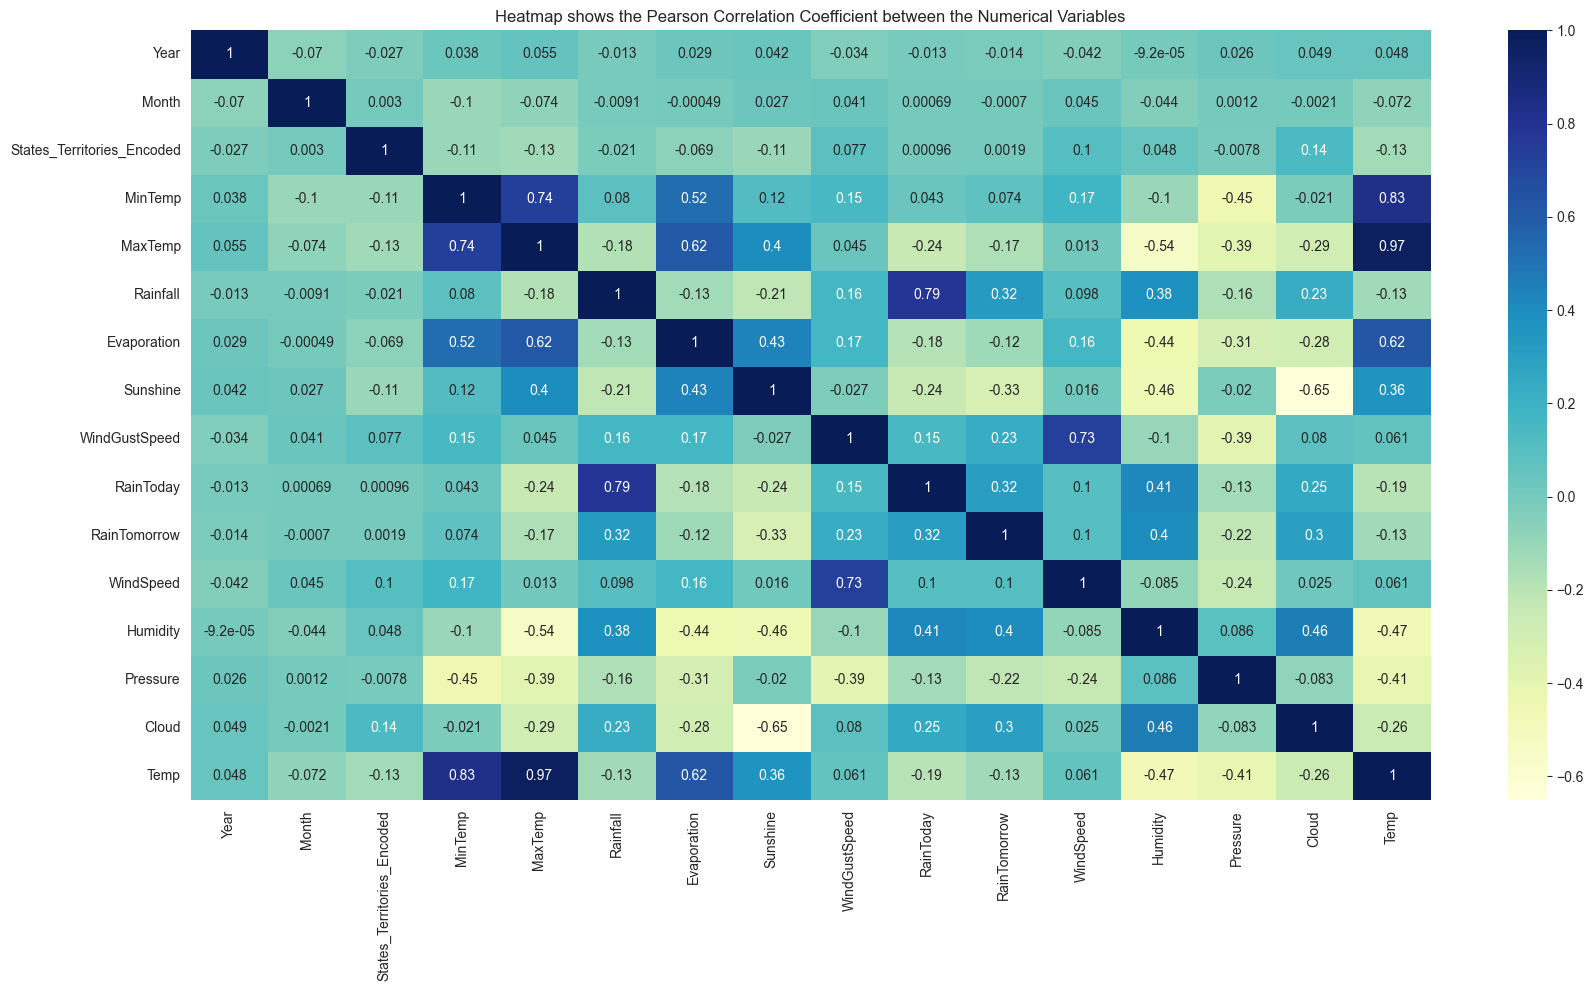

In [43]:
plt.figure(figsize= (20, 10))

mask_heatmap = np.triu(np.ones_like(data.corr(numeric_only= True)))
fig = sns.heatmap(data= data.corr(numeric_only= True), annot= True, cmap= "YlGnBu")
fig.set_title("Heatmap shows the Pearson Correlation Coefficient between the Numerical Variables")

**`Rainfall by Years`**

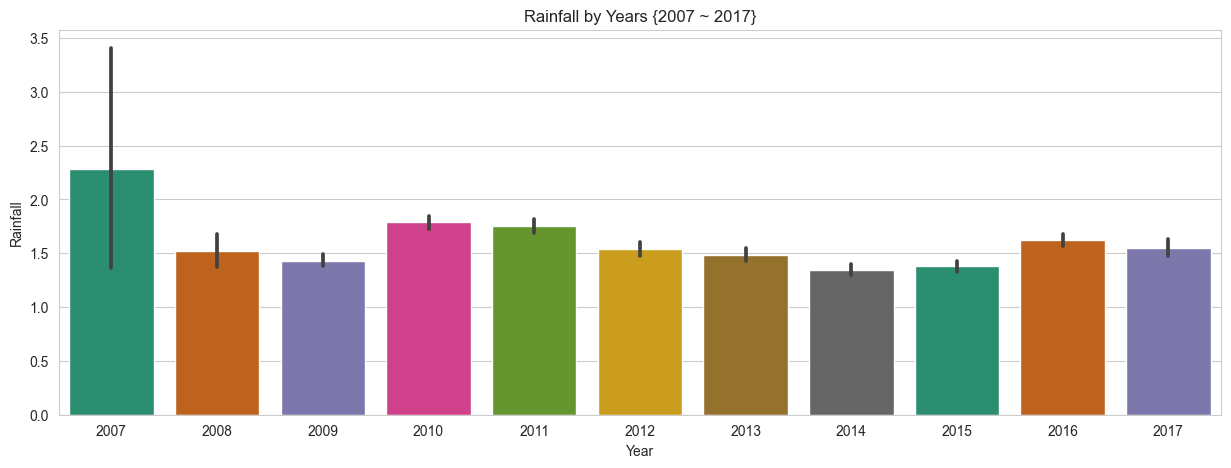

In [46]:
plt.figure(figsize = (15, 5))
fig = sns.barplot(data= data, x= "Year", y= "Rainfall", palette= "Dark2")
fig.set_title("Rainfall by Years {2007 ~ 2017}")
plt.show()

**`RainTomorrow`**

The Percentage of Raining Tomorrow:

In [47]:
data["RainTomorrow"].value_counts(normalize= True) * 100

0.0    77.857893
1.0    22.142107
Name: RainTomorrow, dtype: float64

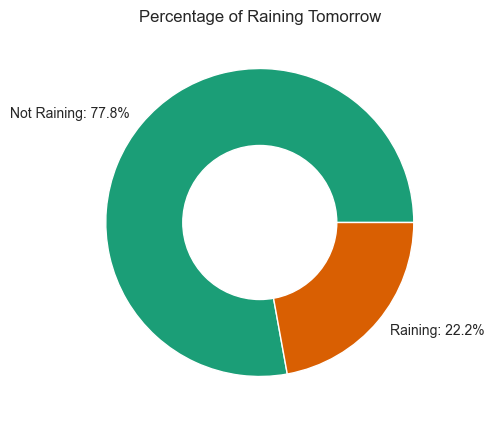

In [48]:
plt.figure( figsize= (15, 5))
plt.pie(x= data["RainTomorrow"].value_counts(), labels= ["Not Raining: 77.8%", "Raining: 22.2%"])
plt.title("Percentage of Raining Tomorrow")

my_circle = plt.Circle( (0,0), 0.5, color= 'white')
p= plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

**`Raining` vs. `Not Raining` by `Month`**

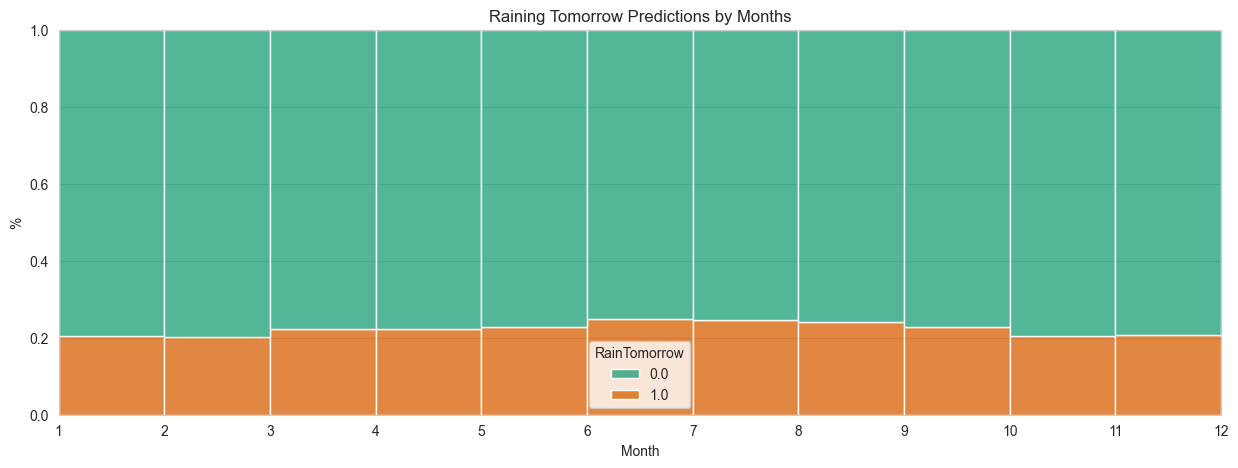

In [49]:
plt.figure(figsize = (15, 5))
fig = sns.histplot(data= data, x= "Month", hue= "RainTomorrow", multiple= "fill", bins= range(1, 13, 1))
fig.set_title("Raining Tomorrow Predictions by Months")
plt.ylabel("%")
plt.xticks(range(1, 13, 1))
plt.show()

**`Raining` vs. `Not Raining` by `States_Territories`**

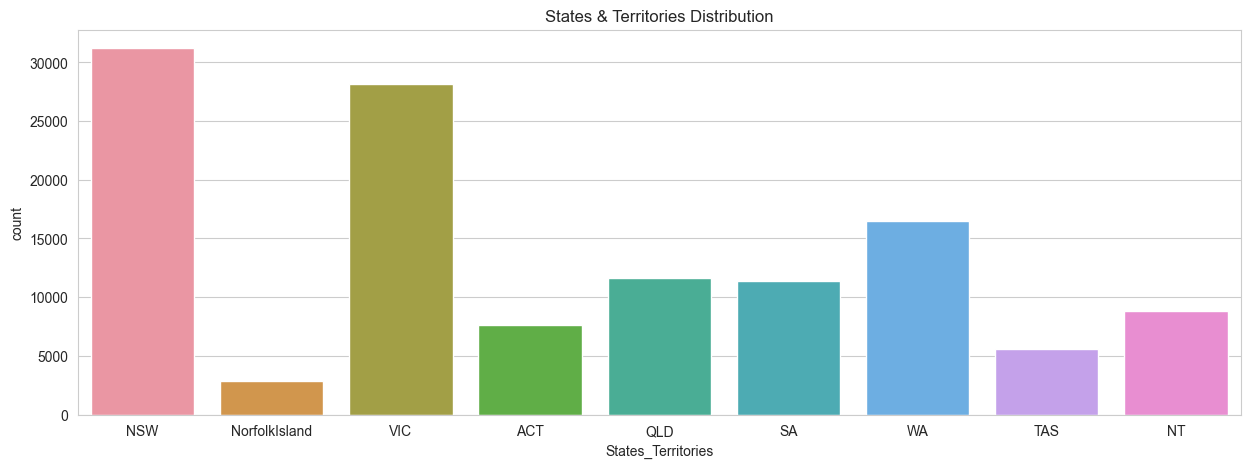

In [50]:
plt.figure( figsize= (15, 5))
sns.countplot(data= data, x= "States_Territories")
plt.title("States & Territories Distribution")
plt.show()

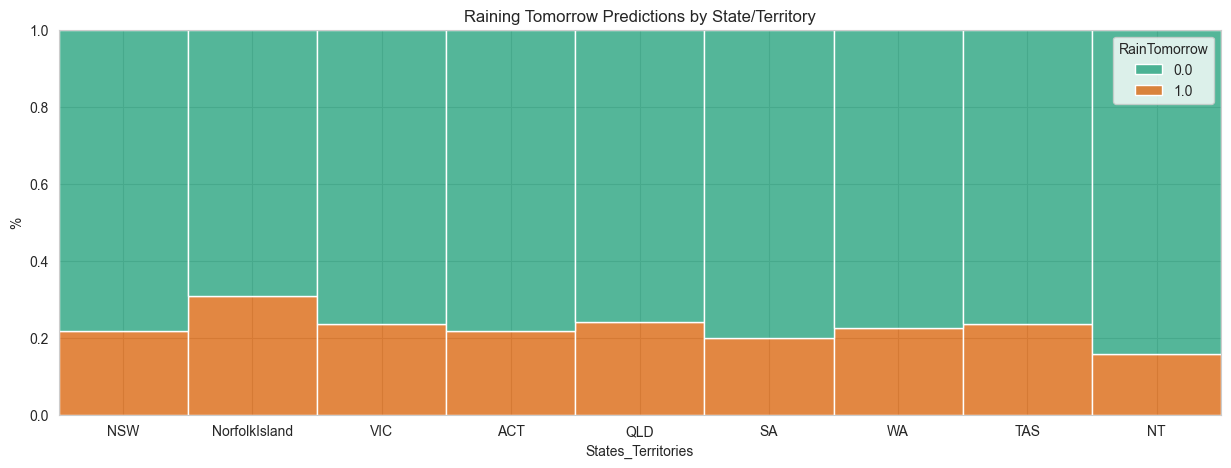

In [51]:
plt.figure(figsize = (15, 5))
fig = sns.histplot(data= data, x= "States_Territories", hue= "RainTomorrow", multiple= "fill")
fig.set_title("Raining Tomorrow Predictions by State/Territory")
plt.ylabel("%")
plt.show()

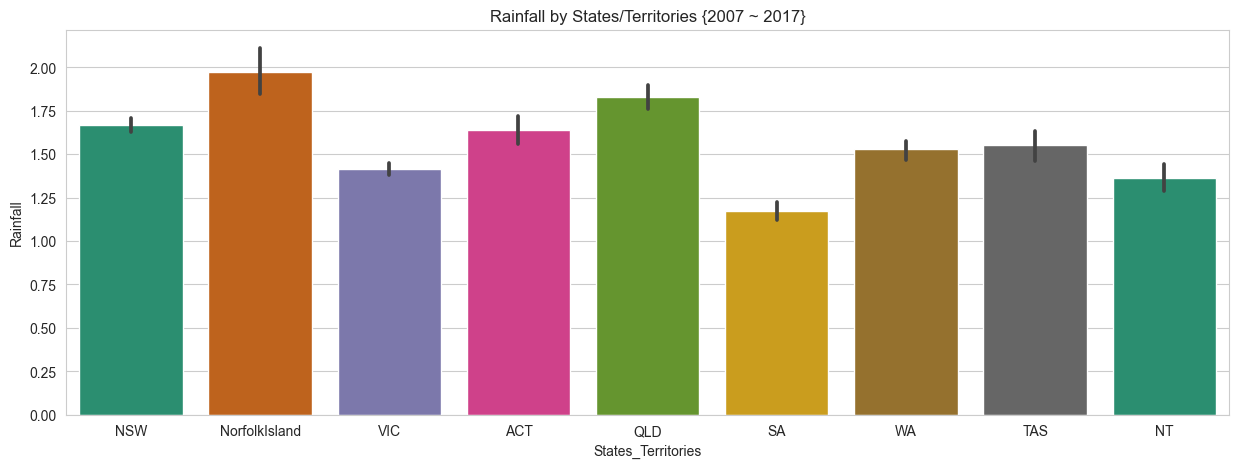

In [52]:
plt.figure(figsize = (15, 5))
fig = sns.barplot(data= data, x= "States_Territories", y= "Rainfall", palette= "Dark2")
fig.set_title("Rainfall by States/Territories {2007 ~ 2017}")
plt.show()